In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from gridemic import gridemic

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
R_zero = []
final_infected_ratio = []

for prob_trans in np.linspace(0.05, 0.15, 21): 

    SEIR = gridemic.Model(seed_random = 1, N = 500, 
                         tauS = 1.0 * prob_trans, etaS = 0.5 * prob_trans, 
                         prob_symptom = 1.0, test_begin=1e99)
    
    basic_reproduction_number = SEIR.reproduction_number()

    population, _ = SEIR.simulate(NTime = 1000)

    final_infected_ratio.append(np.sum(population[SEIR.time - 1, 1:5]) 
                             / (SEIR.N) ** 2)
    R_zero.append(basic_reproduction_number)

Text(0, 0.5, 'Final infected ratio')

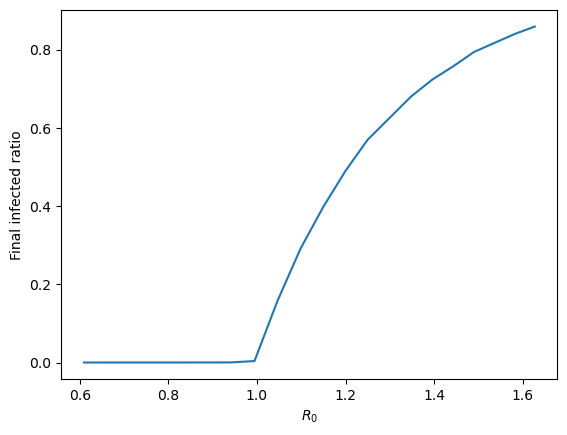

In [3]:
plt.plot(R_zero, final_infected_ratio)
plt.xlabel("$R_0$")
plt.ylabel("Final infected ratio")